# Question 3: Logistic Regression

In [50]:
#Import all the required libraries
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt


## Load the data

In [51]:
# load the data
# Perform important operations on the data

#data = np.load('class0-input.csv')

c0Data = genfromtxt('class0-input.csv', delimiter=',', skip_header= 1)
c1Data = genfromtxt('class1-input.csv', delimiter=',', skip_header= 1)
LData = genfromtxt('labels.csv', delimiter=',', skip_header= 1)
X0 = c0Data
X1 = c1Data

X = np.concatenate((X0, X1), axis=0)

Y = LData
Y = Y.reshape(-1,1)
x = np.ones(Y.shape)
X = np.concatenate((x,X), axis=1)

## Check the shape

In [52]:
# Shape of X
print(np.shape(X))
# Shape of Y
print(np.shape(Y))


(10000, 3)
(10000, 1)


## Visualize the data

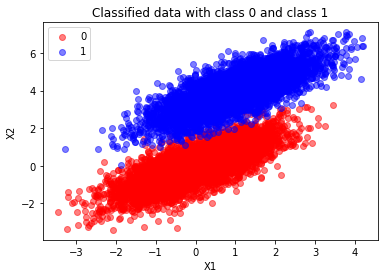

In [53]:
# Use different colors for each class
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
plt.figure
plt.scatter(X0[:,0],X0[:,1],c = 'r',alpha=0.5,label = '0')
plt.scatter(X1[:,0],X1[:,1],c = 'b',alpha=0.5,label = '1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Classified data with class 0 and class 1')
plt.legend()
plt.show()

## Define the required functions

In [54]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(z):
    g = 1/(1+(np.exp(-z)))
    return g

In [55]:
# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(N,h,Y,X):
    
    #print(X[:,0].shape)
    grad1 = np.sum(np.multiply((h-Y),np.reshape(X[:,0],(-1,1))))
    grad2 = np.sum(np.multiply((h-Y),np.reshape(X[:,1],(-1,1))))
    grad3 = np.sum(np.multiply((h-Y),np.reshape(X[:,2],(-1,1))))
    return grad1,grad2, grad3

In [56]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, grad1,grad2,grad3, learning_rate):
    theta = np.zeros((3,1))
    theta[0] = prev_weights[0]-(learning_rate*grad1)
    theta[1] = prev_weights[1]-(learning_rate*grad2)
    theta[2] = prev_weights[2]-(learning_rate*grad3)
    
    return theta

In [57]:
# Use the implemented functions in the main function
# 'main' fucntion should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weigths randomly

def main(X, Y, theta, learning_rate = 0.00005, num_steps = 50000):
    N = len(Y)
    for i in range(num_steps):
        h = sigmoid(np.matmul(X,theta))
        grad1,grad2,grad3 = calculate_gradients(N,h,Y,X)
        theta = update_weights(theta, grad1,grad2,grad3, learning_rate)
    return theta
theta = np.random.rand(3,1)
Trainedtheta = main(X, Y, theta)
print("Final Trained weights are: ", Trainedtheta)


Final Trained weights are:  [[-13.58689831]
 [ -4.88096192]
 [  7.99812501]]


In [58]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(X,Trainedtheta):
    return sigmoid(np.matmul(X,Trainedtheta))


In [59]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels
Y_hat = predict(X,Trainedtheta)
Y_hat[np.where(Y_hat < 0.5)] = 0 
Y_hat[np.where(Y_hat >= 0.5)] = 1

c = 0
for i in range(Y_hat.shape[0]):
    c += int(Y_hat[i] == Y[i])
acc = float(c)/Y_hat.shape[0]
print("Accuracy = ", 100*acc, "%")

Accuracy =  99.48 %


## Visualize the misclassification

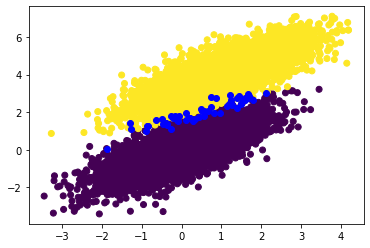

In [60]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
j=0
miss = np.zeros((X.shape[0],2))
for i in range(np.shape(Y)[0]):
    if Y_hat[i] != Y[i]:
        miss[j,:] = X[i,1:]
        j += 1
        

miss = miss[:j,:]
plt.scatter(X[:, 1], X[:, 2], c=Y_hat)
plt.scatter(miss[:, 0], miss[:, 1], c='b')
plt.show()

## Compare the results with sklearn's Logistic Regression

In [61]:
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, Y.reshape(len(Y),))
score = logisticRegr.score(X, Y.reshape(len(Y),))
print(score)

0.9948


The accuracy of sklearn's logistic regression model is equal to what I have achieved using my code. However, some improvements could be made. We can use adaptive learning rate to improve the accuracy. We can perform feature normalization to imorove the accuracy.